# Work-a-long Notebook for:
## [Understand the Data With Univariate And Multivariate Charts and Plots in Python by Rashida Nasrin Sucky](https://towardsdatascience.com/understand-the-data-with-univariate-and-multivariate-charts-and-plots-in-python-3b9fcd68cd8) 


This notebook is designed to be used as you read through the article.  

**Note:** This is not an exact one-to-one walkthrough.  You will find extra questions, extra python methods, and extra plots.  The goal is to help you better understand how to create questions about your data to discover correlations and patterns.  Also, this is NOT the only way to explore your data set.

**Chart Context:** The [Heart dataset](https://www.kaggle.com/johnsmith88/heart-disease-dataset) is also part of the GitHub folder.  Be sure to explore the context provided with the dataset on Kaggle.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels import api as sm
import numpy as np

df = pd.read_csv("C:/Users/emmag/Desktop/Women+/DataCleaning-Heart-Data/heart.csv")

In [ ]:
# Note:  make sure you provide the correct file path for your 'df' variable.

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


##### Question: (Answer to yourself)
Have you looked at the context behind the data on kaggle? (link in top box)
Do you know or have an understanding of each item being studied?
If not, have you done some basic research yet?

In [ ]:
# The author of the article has already devised a few questions for us to work through.
# As we continue, you will be asked questions about other items within the data.
# This is to help you experience the question/answer phase, and help you better explore your data

### A Quick Note!

The data in this article has already been cleaned up. 
The exact methods have not be disclosed.  In this notebook, we cleaned the data in a way we felt worked best.  However, the final outcome is 302 records instead of 303.  Please be aware of this slight discrepency when checking your answers with the walkthrough.  Your values might be slightly smaller, but the exploration process will still be of value to you.

Data cleaning includes removing duplicate records, values can be updated, formatting the index names, etc.  We will cover this topic in more depth in the next lesson.  In the next few blocks, you will see a sneak peek of the cleaning process.  

In [4]:
# Print the column names  
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# Note the difference between your column names and the names from the article
# Since the names are strings, let's use a string method to make them match

df.columns = df.columns.str.capitalize()
df.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')

In [6]:
# Renaming columns for easier comprehension
df = df.rename(columns={"Cp": "ChestPain", "Trestbps": "RestBP", "Restecg": "RestECG", "Exang":"ExAng"})

In [7]:
# Checking initial size of dataframe
df.shape

(1025, 14)

In [8]:
# Checking for duplicates
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_df.shape)

Number of duplicated rows:  (723, 14)


In [9]:
# Dropping the duplicates then rechecking the shape
df = df.drop_duplicates()
df.shape

# Note, our final count is 302.  
# The final count in the article is 303.  
# This small discrepency should not affect your values enough to prevent you from walking through the artcle.

(302, 14)

In [10]:
# Updating the values in "Sex" where 0 = "Female" and 1 = "Male"

df = df.replace({"Sex": {0: "Female", 1: "Male"}})

In [11]:
# Updating the values in the "Thal" column to reflect what each value means.

df = df.replace({"Thal": {1: "Normal", 2: "Fixed", 3: "Reversable", 0: "Missing"}})

In [12]:
# Updating the values in the "ChestPain" column to reflect what each number means

df = df.replace({"ChestPain" : {0 : "asymptomatic", 1 : "nonanginal", 2 : "nontypical", 3 : "typical"}})

In [97]:
# testing replaced updates
df.head()


# Here ends the data cleaning section

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,Thalach,ExAng,Oldpeak,Slope,Ca,Thal,Target,agegrp,Sex1
0,52,Male,asymptomatic,125,212,0,1,168,no,1.0,2,2,Reversable,0,"(50, 60]",Male
1,53,Male,asymptomatic,140,203,1,0,155,yes,3.1,0,0,Reversable,0,"(50, 60]",Male
2,70,Male,asymptomatic,145,174,0,1,125,yes,2.6,0,0,Reversable,0,"(60, 70]",Male
3,61,Male,asymptomatic,148,203,0,1,161,no,0.0,2,1,Reversable,0,"(60, 70]",Male
4,62,Female,asymptomatic,138,294,1,1,106,no,1.9,1,3,Fixed,0,"(60, 70]",Female


### Solve Some Questions

### Question 1:  Find the population proportions with different types of blood disorders

**Part A:** In this example we are going to use the "Thal" column.
Follow along with the article for syntax and explanations of the output.

*Remember:* with duplicated rows dropped, our final record count is 302 and the author's is 303.

In [96]:
# Definitions and Question:

# Define 'value_counts()': This will tell us the number of each type of blood condition present in the dataset

# Why is this method used as part of initalizing a new varible? When we initialize it as a new variable, we can use that variable in further code that we write; it simplifies it and makes it easy to return back to

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,Thalach,ExAng,Oldpeak,Slope,Ca,Thal,Target,agegrp,Sex1
0,52,Male,asymptomatic,125,212,0,1,168,no,1.0,2,2,Reversable,0,"(50, 60]",Male
1,53,Male,asymptomatic,140,203,1,0,155,yes,3.1,0,0,Reversable,0,"(50, 60]",Male
2,70,Male,asymptomatic,145,174,0,1,125,yes,2.6,0,0,Reversable,0,"(60, 70]",Male
3,61,Male,asymptomatic,148,203,0,1,161,no,0.0,2,1,Reversable,0,"(60, 70]",Male
4,62,Female,asymptomatic,138,294,1,1,106,no,1.9,1,3,Fixed,0,"(60, 70]",Female


In [93]:
# Define a variable for the value counts of the Thal column.
x=df.Thal.value_counts()
x

# Note: In the data set, some values were passed 0 rather than left missing.  
# These values have been replaced with "Missing".
# Having this already filled in, will not affect your walkthrough, at this point

Fixed         165
Reversable    117
Normal         18
Missing         2
Name: Thal, dtype: int64

In [94]:
# Calculate the population proportion here:

thalproportions=x/x.sum()
thalproportions

Fixed         0.546358
Reversable    0.387417
Normal        0.059603
Missing       0.006623
Name: Thal, dtype: float64

In [95]:
# Turn those proportions into percentages:
thalproportions=thalproportions.mul(100).round(1).astype(str) + '%'
thalproportions

Fixed         54.6%
Reversable    38.7%
Normal         6.0%
Missing        0.7%
Name: Thal, dtype: object

**Part B:**  Let's examine the proportions of other populations within this dataset.

Let's look at "ExAng" or, as the provided context informs us, exercise induced angina.

We are going to follow the steps provided with the "Thal" values.

In [45]:
# Define a variable for the value counts of the Exang column.

y = df.ExAng.value_counts()
y

no     203
yes     99
Name: ExAng, dtype: int64

In [40]:
# Calculate the population proportions:
exangproportions=y/y.sum()
exangproportions

# Look at the context to see what 1 and 0 mean.

0    0.672185
1    0.327815
Name: ExAng, dtype: float64

In [41]:
# Turn those propotions into percentages:
exangproportions=exangproportions.mul(100).round(1).astype(str) + "%"
exangproportions

0    67.2%
1    32.8%
Name: ExAng, dtype: object

**Part C:**  Select one of the other populations to examine.

In [50]:
# Define a variable for the value counts of the your column.

z = df.Fbs.value_counts()
z

0    257
1     45
Name: Fbs, dtype: int64

In [51]:
# Calculate the population proportions:
fbsproportions=z/z.sum()
fbsproportions

# Does the context provide you with any information about the values? Yes - value of 1 is fbs of greater than 120(likely high), and a vlue of 0 is less thn 120(likely not high)

0    0.850993
1    0.149007
Name: Fbs, dtype: float64

In [52]:
# Turn those propotions into percentages:
fbsproportions=fbsproportions.mul(100).round(1).astype(str) + "%"
fbsproportions

0    85.1%
1    14.9%
Name: Fbs, dtype: object

### Question 2: Find the minimum, maximum, average, and standard deviation of Cholesterol data.

Remember: Our total is 302, not 303.

In [53]:
# using only the Cholesterol column in the dataset, apply the describe function.

df["Chol"].describe()

count    302.000000
mean     246.500000
std       51.753489
min      126.000000
25%      211.000000
50%      240.500000
75%      274.750000
max      564.000000
Name: Chol, dtype: float64

### Question 3: Make a plot of the distribution of the Cholesterol data.

**Part A:** Plot the Cholestorol data

<Axes: xlabel='Chol', ylabel='Count'>

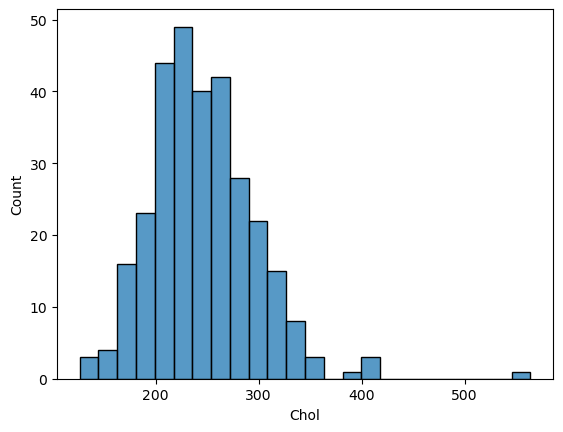

In [56]:
# Plot the distribution here:


# Why is this a "histplot" and not a "distplot"?  
# According to the seaborn (sns) documentation, 
#  the "distplot" is a depricated function and will be removed in a future version.
# So let's explore other options in this learning space.

# Could also try to use 
sns.histplot(df.Chol.dropna())

In [ ]:
# Do you see any outliers? Yes - a few with cholesterol levels around 400 and one well over 500

<Axes: xlabel='Chol', ylabel='Count'>

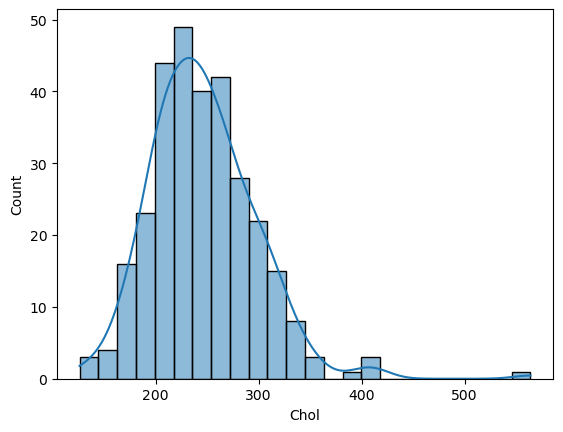

In [57]:
# Want the histogram with the standard deviation curve on the same plot? 

# Here is they syntax:
sns.histplot(data=df, x="Chol", kde=True)

[Documentation on the histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) to better understand the syntax.

**Part B:** Describe and Plot the Resting Heart Rate values

In [58]:
# code the describe() for RestBP
df["RestBP"].describe()

count    302.000000
mean     131.602649
std       17.563394
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestBP, dtype: float64

<Axes: xlabel='RestBP', ylabel='Count'>

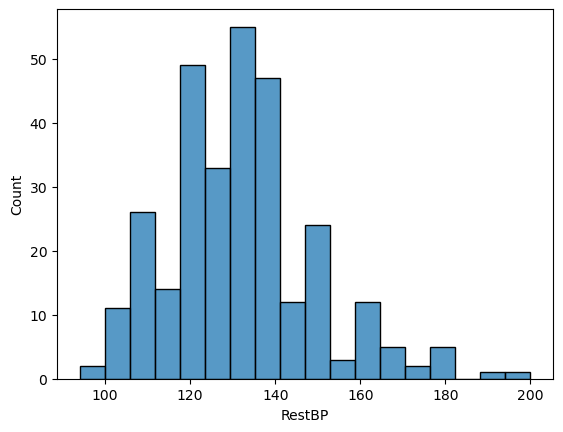

In [59]:
# Let's plot The resting heart rate, "RestBP".  
#You can choose to plot using "histplot" or "displot".  Your choice.
sns.histplot(df.RestBP.dropna())

In [ ]:
# Any outliers? Yes, several beginning at 60 and getting higher from there

**Part C:** Describe and Plot the values you selected in Question 1 part c.

count    302.000000
mean       0.149007
std        0.356686
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Fbs, dtype: float64


<Axes: xlabel='Fbs', ylabel='Count'>

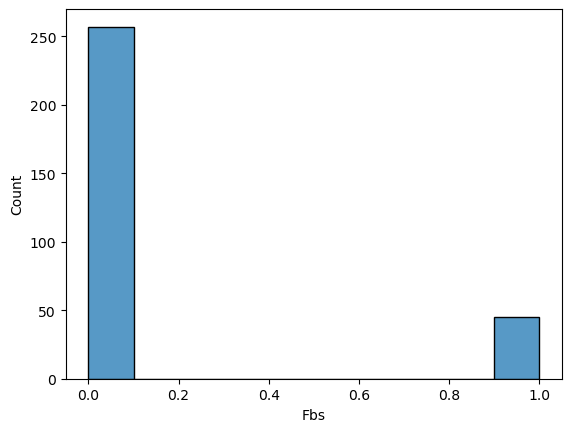

In [63]:
# Plot Part C here: 
print(df["Fbs"].describe())
sns.histplot(df.Fbs.dropna())

### Question 4: Find the mean of the RestBP and calculate the population proportion of the people who have the higher RestBP than the mean RestBP.

In [76]:
# Calculate the mean of the RestBp and print it
meanrbp=df.RestBP.mean()
meanrbp

131.60264900662253

In [71]:
# Question: Is the .dropna() siginificant or necessary for calculating the mean_rbp? It doesn't appear to be as the value is the same without it

In [80]:
# Calculate population proportion of people who have higher RestBP than the average

len(df[df["RestBP"] > meanrbp])/len(df)

# Questions: 

# 1. Translate this line of code in plain English? the section before the division sign says to take the portion (in length - or number or rows) of the dataframe where the RestBP is greater than the meanBP calculated above - the section after the division sign takes that figure and divides it by the total length (number of rows) in the dataframe, thus creating a percentage (but still represented in decimal form). 

# 2.  Break this line and examine your results.  What did you change?  What happened? I took out the length function and got an error.


0.4337748344370861

### Question 5: Plot the Cholesterol data against the age group

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,Thalach,ExAng,Oldpeak,Slope,Ca,Thal,Target,agegrp,Sex1
0,52,Male,asymptomatic,125,212,0,1,168,no,1.0,2,2,Reversable,0,"(50, 60]",Male
1,53,Male,asymptomatic,140,203,1,0,155,yes,3.1,0,0,Reversable,0,"(50, 60]",Male
2,70,Male,asymptomatic,145,174,0,1,125,yes,2.6,0,0,Reversable,0,"(60, 70]",Male
3,61,Male,asymptomatic,148,203,0,1,161,no,0.0,2,1,Reversable,0,"(60, 70]",Male
4,62,Female,asymptomatic,138,294,1,1,106,no,1.9,1,3,Fixed,0,"(60, 70]",Female


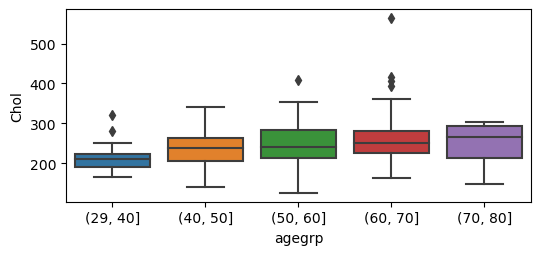

In [104]:
df["agegrp"]=pd.cut(df.Age, [29,40,50,60,70,80])
plt.figure(figsize=(6,2.5))
sns.boxplot(x = "agegrp", y = "Chol", data=df)
df.head()

In [ ]:
# Questions for you to answer:

# Looking at the code that was used to create the box plot, 
#   explain what the following code means in your own words:

# 1. pandas.cut():this code appears to group data elements (in this case, age) together to create new categories for visualization. this creates a new column with the bins in it

# 2. Looking at the cut() method signature, what is a "bin": the bin is the grouping of the elements dictated by the coder

# 3. plt.figure(): this creates a figure of the data and the argument specifies the height and width of the figure

# 3 A - in the code above, what do the numbers in figsize mean?  What happens if you change them? If you change them, the size of the figure changes

# 4. sns.boxplot(x = ??, y = ??, data= ??): this creates the specific graph within the figure and specifies what variable is the x axis and wha variable is the y, as well as which dataframe the data is being pulled from


<Axes: xlabel='agegrp', ylabel='Chol'>

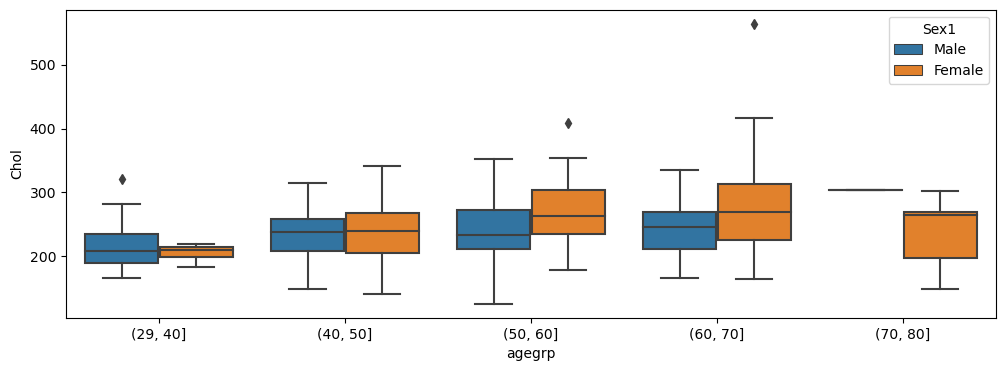

In [99]:
# Combine sex and cholesterol data here:

df["Sex1"] = df.Sex.replace({1: "Male", 0: "Female"})
plt.figure(figsize=(12, 4))
sns.boxplot(x = "agegrp", y = "Chol", hue = "Sex1", data=df)

# Why did the author run this: df["Sex1"] = df.Sex.replace({1: "Male", 0: "Female"}) this created a new column in the dataset that used names rather than numbers to give sex, this makes the graph easier to read

# What does that line mean, in your own words: it means to create a new column called Sex1 and change every value in the column Sex that is a 1 to Male and a 0 to Female. This is actually unnecessary as the authors of this starter code already replaced the 0 and 1 values with Female and Male.


# There is a new argument in the boxplot function.  Look up what "hue" means. Hue further differentiates the data by incorporating the Sex variable. Without it, the boxplot shows combined male and female figures

<Axes: xlabel='Sex1', ylabel='Age'>

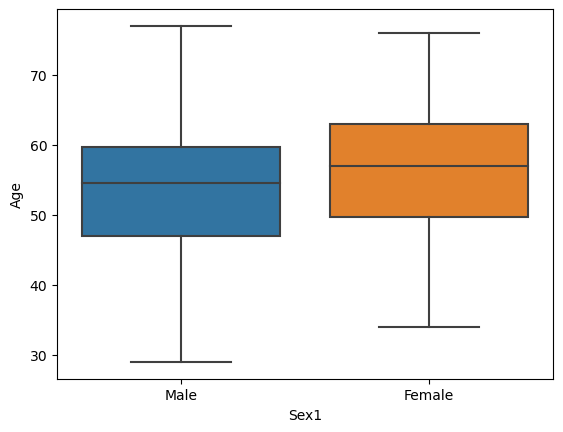

In [100]:
# How does the sns.boxplot(x = "Sex1", y = "Age", data=df) differ from the one in the cell above? This boxplot doesn't show cholesterol at all

sns.boxplot(x="Sex1",y="Age",data=df)

# What information does this provide you? the only information you are getting is the general ages (and highest, lowest, and median value) of the sex of the participants in the study

### Question 6:  Make a chart to show the number of people having each type of chest pain

In [101]:
df.groupby("agegrp")["ChestPain"].value_counts().unstack()

ChestPain,asymptomatic,nonanginal,nontypical,typical
agegrp,,,,
"(29, 40]",6.0,2.0,6.0,3.0
"(40, 50]",29.0,20.0,25.0,2.0
"(50, 60]",65.0,20.0,34.0,10.0
"(60, 70]",41.0,5.0,19.0,8.0
"(70, 80]",2.0,2.0,2.0,NaN


In [105]:
# Run the following line of code:

df.groupby("agegrp")["ChestPain"].value_counts()

# Question:  
# 1. How does the output vary between these two lines?  the code with the unstack method returns a dataframe instead of the very repetitive list below

agegrp    ChestPain   
(29, 40]  asymptomatic     6
          nontypical       6
          typical          3
          nonanginal       2
(40, 50]  asymptomatic    29
          nontypical      25
          nonanginal      20
          typical          2
(50, 60]  asymptomatic    65
          nontypical      34
          nonanginal      20
          typical         10
(60, 70]  asymptomatic    41
          nontypical      19
          typical          8
          nonanginal       5
(70, 80]  asymptomatic     2
          nonanginal       2
          nontypical       2
Name: ChestPain, dtype: int64

### Question 7: Add on to your chart, but segregate by gender.

In [106]:
dx = df.dropna().groupby(["agegrp", "Sex"])["ChestPain"].value_counts().unstack()
print(dx)

ChestPain        asymptomatic  nonanginal  nontypical  typical
agegrp   Sex                                                  
(29, 40] Female           1.0         1.0         3.0      NaN
         Male             5.0         1.0         3.0      3.0
(40, 50] Female           6.0         8.0         8.0      NaN
         Male            23.0        12.0        17.0      2.0
(50, 60] Female          15.0         6.0        12.0      2.0
         Male            50.0        14.0        22.0      8.0
(60, 70] Female          16.0         1.0        10.0      2.0
         Male            25.0         4.0         9.0      6.0
(70, 80] Female           1.0         2.0         2.0      NaN
         Male             1.0         NaN         NaN      NaN


### Question 8:  Present population proportion for each type of chest pain

In [107]:
dx = dx.apply(lambda x: x/x.sum(), axis=1)
print(dx)

ChestPain        asymptomatic  nonanginal  nontypical   typical
agegrp   Sex                                                   
(29, 40] Female      0.200000    0.200000    0.600000       NaN
         Male        0.416667    0.083333    0.250000  0.250000
(40, 50] Female      0.272727    0.363636    0.363636       NaN
         Male        0.425926    0.222222    0.314815  0.037037
(50, 60] Female      0.428571    0.171429    0.342857  0.057143
         Male        0.531915    0.148936    0.234043  0.085106
(60, 70] Female      0.551724    0.034483    0.344828  0.068966
         Male        0.568182    0.090909    0.204545  0.136364
(70, 80] Female      0.200000    0.400000    0.400000       NaN
         Male        1.000000         NaN         NaN       NaN


Note on your output, as we made this notebook, we discovered that the ariticle dataset had been cleaned prior to our usage.  The methods used were not disclosed, so we cleaned ourselves.  Which could explain the discrepencies in this chart.

In [ ]:
# Questions: In your own words:

# 1. What does the apply() function do? the apply function works to apply the following written code to all either rows or columns in a particular dataframe


# 2. What is lambda? lambda basically applies the function in a loop